In [2]:
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
from scipy import stats
kwestionariusze_pilot = pd.read_csv("K:/20. PWR/04. Parsemo/Bazy danych/Pilot do publikacji/kwestionariusze/HumanNLP_kwestionariusze.csv", sep=';',low_memory=False)
hubi = pd.read_csv("K:/20. PWR/04. Parsemo/Bazy danych/Pilot do publikacji/HuBi.csv")
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import numpy as np
from sklearn.cluster import KMeans


In [22]:
nowe_nazwy_kolumn = {"Ośekonomiczna":"Ośekonomiczna",
"user_id                       ":"user_id                       ",
"Ośekonomiczna                 ":"Ośekonomiczna                 ",
"Ośświatopoglądowaspołeczna":"Ośświatopoglądowaspołeczna",
"Dochody":"Dochody",
"Dzieci":"Dzieci",
"Język":"Język",
"Narodowość":"Narodowość",
"Obecniestudiujesz":"Obecniestudiujesz",
"Opieka":"Opieka",
"PłećGender":"PłećGender",
"Religia":"Religia",
"Sektorzatrudnienia":"Sektorzatrudnienia",
"Statuszwiązku":"Statuszwiązku",
"Wiek":"Wiek",
"Wielkośćgospodarstwadomowego":"Wielkośćgospodarstwadomowego",
"Wykształcenie":"Wykształcenie",
"Zatrudnienie":"Zatrudnienie",
"Poglądypolityczne":"Poglądypolityczne",
"FS_total":"Flourishing",
"HSQ_A":"Affiliative humor",
"HSQ_SE":"Self-enhancing humor",
"HSQ_AG":"Aggressive humor",
"HSQ_SD":"Self-defeating humor",
"IPIP_Ugodowość":"Agreeableness",
"IPIP_Ekstrawersja":"Extraversion",
"IPIP_Sumienność":"Conscientiousness",
"IPIP_Neurotyzm":"Neuroticism",
"IPIP_Intelekt":"Intellect",
"PAQ":"Alexytymia",
"PHQ_9":"Depression",
"PSS":"Stress",
"RESS_Relaxation":"Relaxation",
"RESS_Engagement":"Engagement",
"RESS_Rumination":"Rumination",
"RESS_Reappraisal":"Reappraisal",
"RESS_Distraction":"Distraction",
"RESS_Suppression":"Suppression",
"SPANE_P":"Positive affect",
"SPANE_N":"Negative affect",
"SWLS_suma":"Satisfaction with Life",
"PHQ_SD":"Sleep Disturbance",
"PHQ_H":"Headaches",
"PHQ_GP":"Gastrointestinal Problems",
"PHQ_RI":"Respiratory Infections",
"Pomiar                        ":"Pomiar",
"updated_at                    ":"updated_at",
"Pozytywne_bias":"Positive (bias)",
"Negatywne_bias":"Negative (bias)",
"Radość_bias":"Joy (bias)",
"Zachwyt_bias":"Delight (bias)",
"Inspiruje_bias":"Inspiration (bias)",
"Spokój_bias":"Calm (bias)",
"Zaskoczenie_bias":"Surprise (bias)",
"Współczucie_bias":"Compassion (bias)",
"Strach_bias":"Fear (bias)",
"Smutek_bias":"Sadness (bias)",
"Wstręt_bias":"Disgust (bias)",
"Złość_bias":"Anger (bias)",
"Ironiczny_bias":"Ironic (bias)",
"Żenujący_bias":"Embarrassing (bias)",
"Wulgarny_bias":"Vulgar (bias)",
"Polityczny_bias":"Political (bias)",
"Interesujący_bias":"Interesting (bias)",
"Zrozumiały_bias":"Understandable (bias)",
"Zgadzam się z tekstem_bias":"Agreement (bias)",
"Wierzę w tę informację_bias":"Trust (bias)",
"Potrzebuję więcej informacji, aby ocenić ten tekst_bias":"Incomprehensible (bias)",
"Czuję sympatię do autora_bias":"Sympathy (bias)",
"Obraża mnie_bias":"Offensive to me (bias)",
"Może kogoś atakować / obrażać / lekceważyć_bias ":"Offensive to someone (bias)",
"Mnie bawi/śmieszy?_bias":"Funny to me (bias)",
"Może kogoś bawić?_bias":"Funny to someone (bias)",
}






In [23]:
kwestionariusze_pilot = kwestionariusze_pilot.rename(columns=nowe_nazwy_kolumn)

In [5]:
hubi = hubi.rename(columns={"annotator_id" : "user_id",
"Pozytywne_bias":"Positive (bias)",
"Negatywne_bias":"Negative (bias)",
"Radość_bias":"Joy (bias)",
"Zachwyt_bias":"Delight (bias)",
"Inspiruje_bias":"Inspiration (bias)",
"Spokój_bias":"Calm (bias)",
"Zaskoczenie_bias":"Surprise (bias)",
"Współczucie_bias":"Compassion (bias)",
"Strach_bias":"Fear (bias)",
"Smutek_bias":"Sadness (bias)",
"Wstręt_bias":"Disgust (bias)",
"Złość_bias":"Anger (bias)",
"Ironiczny_bias":"Ironic (bias)",
"Żenujący_bias":"Embarrassing (bias)",
"Wulgarny_bias":"Vulgar (bias)",
"Polityczny_bias":"Political (bias)",
"Interesujący_bias":"Interesting (bias)",
"Zrozumiały_bias":"Understandable (bias)",
"Zgadzam się z tekstem_bias":"Agreement (bias)",
"Wierzę w tę informację_bias":"Trust (bias)",
"Potrzebuję więcej informacji, aby ocenić ten tekst_bias":"Incomprehensible (bias)",
"Czuję sympatię do autora_bias":"Sympathy (bias)",
"Obraża mnie_bias":"Offensive to me (bias)",
"Może kogoś atakować / obrażać / lekceważyć_bias":"Offensive to someone (bias)",
"Mnie bawi/śmieszy?_bias":"Funny to me (bias)",
"Może kogoś bawić?_bias":"Funny to someone (bias)",})

In [6]:
print(hubi)

    user_id  Positive (bias)  Negative (bias)  Joy (bias)  Delight (bias)  \
0         0         0.476416         0.146277    0.262994        0.299793   
1         1        -0.490222        -0.395257   -0.536532       -0.452273   
2         2        -0.178169        -0.046360   -0.179661       -0.225199   
3         3        -0.298444         0.220206   -0.236856       -0.413435   
4         4        -0.023946        -0.072908   -0.382666       -0.323005   
5         5        -0.215155         0.031826   -0.456513       -0.299285   
6         6        -0.215191         0.271669   -0.099473       -0.305877   
7         7        -0.197823         0.191751   -0.432299       -0.132113   
8         8         0.241255         0.236328   -0.067939        0.076896   
9         9         0.028451         0.214923   -0.444901       -0.362801   
10       10         0.161873         0.527873    0.107693        0.257971   
11       11        -0.229332         0.942563   -0.208400       -0.069442   

In [7]:
pomiary_hubi_kwestionariusze = pd.merge(hubi, kwestionariusze_pilot, on='user_id')

Humor styles

AxesSubplot(0.125,0.11;0.62x0.77)


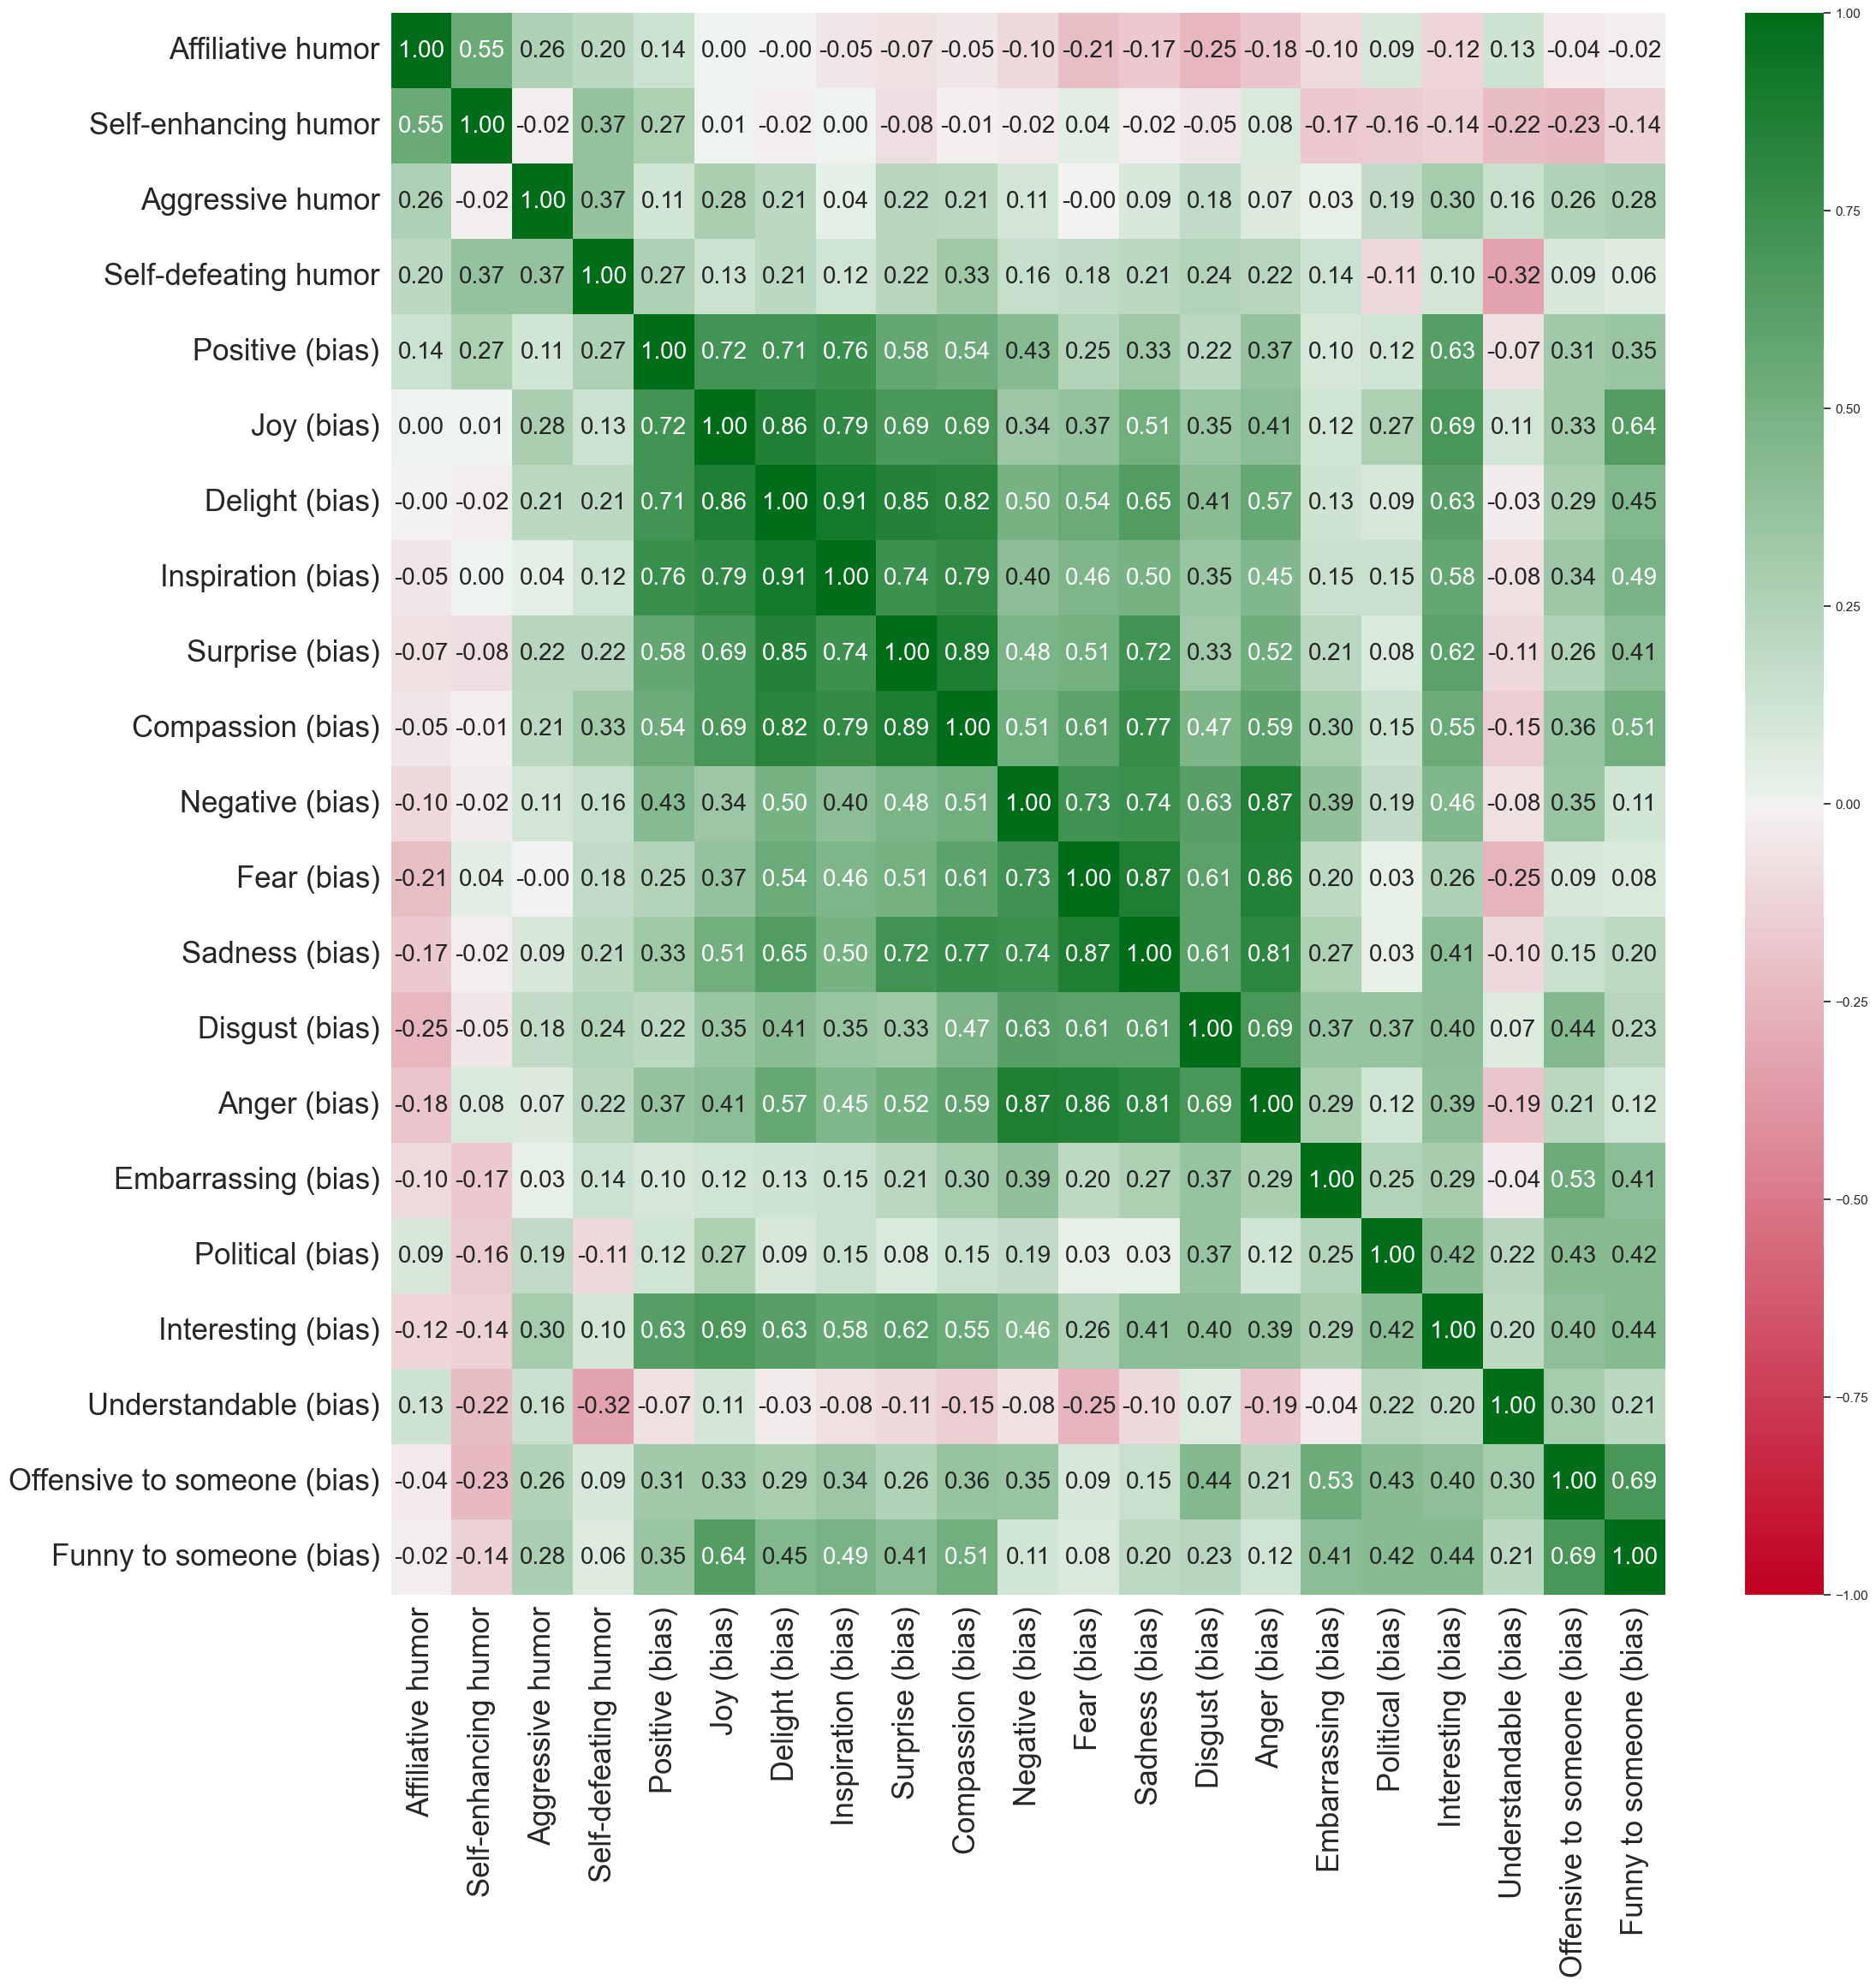

In [11]:
do_korelacji_humor_cols =  ["Affiliative humor","Self-enhancing humor","Aggressive humor","Self-defeating humor",
                            "Pozytywne_bias","Może kogoś bawić?_bias","Mnie bawi/śmieszy?_bias",
                    "Radość_bias","Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias", "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias","Polityczny_bias","Interesujący_bias",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                    "Obraża mnie_bias","Może kogoś atakować / obrażać / lekceważyć_bias"]
do_korelacji_humor_cols_poz = ["Affiliative humor","Self-enhancing humor","Aggressive humor","Self-defeating humor",
                    "Pozytywne_bias","Radość_bias",
                    "Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias"]
do_korelacji_humor_cols_neg = ["Affiliative humor","Self-enhancing humor","Aggressive humor","Self-defeating humor",
                    "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias"] 
do_korelacji_humor_cols_per = ["Interesujący_bias",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                   "Mnie bawi/śmieszy?_bias", "Może kogoś bawić?_bias" ]
humor_wybrane =  ["Affiliative humor","Self-enhancing humor","Aggressive humor","Self-defeating humor",
                    "Positive (bias)",
                    "Joy (bias)","Delight (bias)","Inspiration (bias)",
                    "Surprise (bias)","Compassion (bias)","Negative (bias)",
                    "Fear (bias)","Sadness (bias)","Disgust (bias)",
                    "Anger (bias)","Embarrassing (bias)",
                    "Political (bias)","Interesting (bias)",
                    "Understandable (bias)",
                    "Offensive to someone (bias)", "Funny to someone (bias)"]
df_selected_humor = pomiary_hubi_kwestionariusze[humor_wybrane]
#heatmapa style humoru 
sns.set (rc = {'figure.figsize':(24, 24)})
Accent = sns.diverging_palette(h_neg=10, h_pos=130, s=100, l=40, sep=1, as_cmap=True, ) 
style_humoru_matrix = sns.heatmap(df_selected_humor.corr(), annot_kws={"size":20 },cmap =Accent, annot= True,fmt='.2f',
            vmin=-1, 
            vmax=1,
            center=0,)
style_humoru_matrix.set_xticklabels(style_humoru_matrix.get_xticklabels(), fontsize=25)  # Dostosuj wielkość etykiet osi x
style_humoru_matrix.set_yticklabels(style_humoru_matrix.get_yticklabels(), fontsize=25)  # Dostosuj wielkość
print(style_humoru_matrix)




Personality

In [12]:
do_korelacji_osobowosc_cols = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                            "Pozytywne_bias","Może kogoś bawić?_bias","Mnie bawi/śmieszy?_bias",
                    "Radość_bias","Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias", "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias","Polityczny_bias","Interesujący_bias",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                    "Obraża mnie_bias","Może kogoś atakować / obrażać / lekceważyć_bias"]
do_korelacji_osobowosc_cols_poz = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Pozytywne_bias","Radość_bias",
                    "Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias"]
do_korelacji_osobowosc_cols_neg = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias"] 
do_korelacji_osobowosc_cols_per = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                   "Mnie bawi/śmieszy?_bias", "Może kogoś bawić?_bias" ]
osobowosc_wybrane =  ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Positive (bias)",  
                    "Joy (bias)","Delight (bias)","Inspiration (bias)","Calm (bias)",
                    "Surprise (bias)","Compassion (bias)","Negative (bias)",
                    "Fear (bias)","Sadness (bias)",
                    "Anger (bias)", "Embarrassing (bias)","Vulgar (bias)",
                    "Political (bias)",
                    "Understandable (bias)", "Offensive to me (bias)",
                    "Offensive to someone (bias)", "Funny to me (bias)",]
df_selected_osobowosc = pomiary_hubi_kwestionariusze[osobowosc_wybrane]

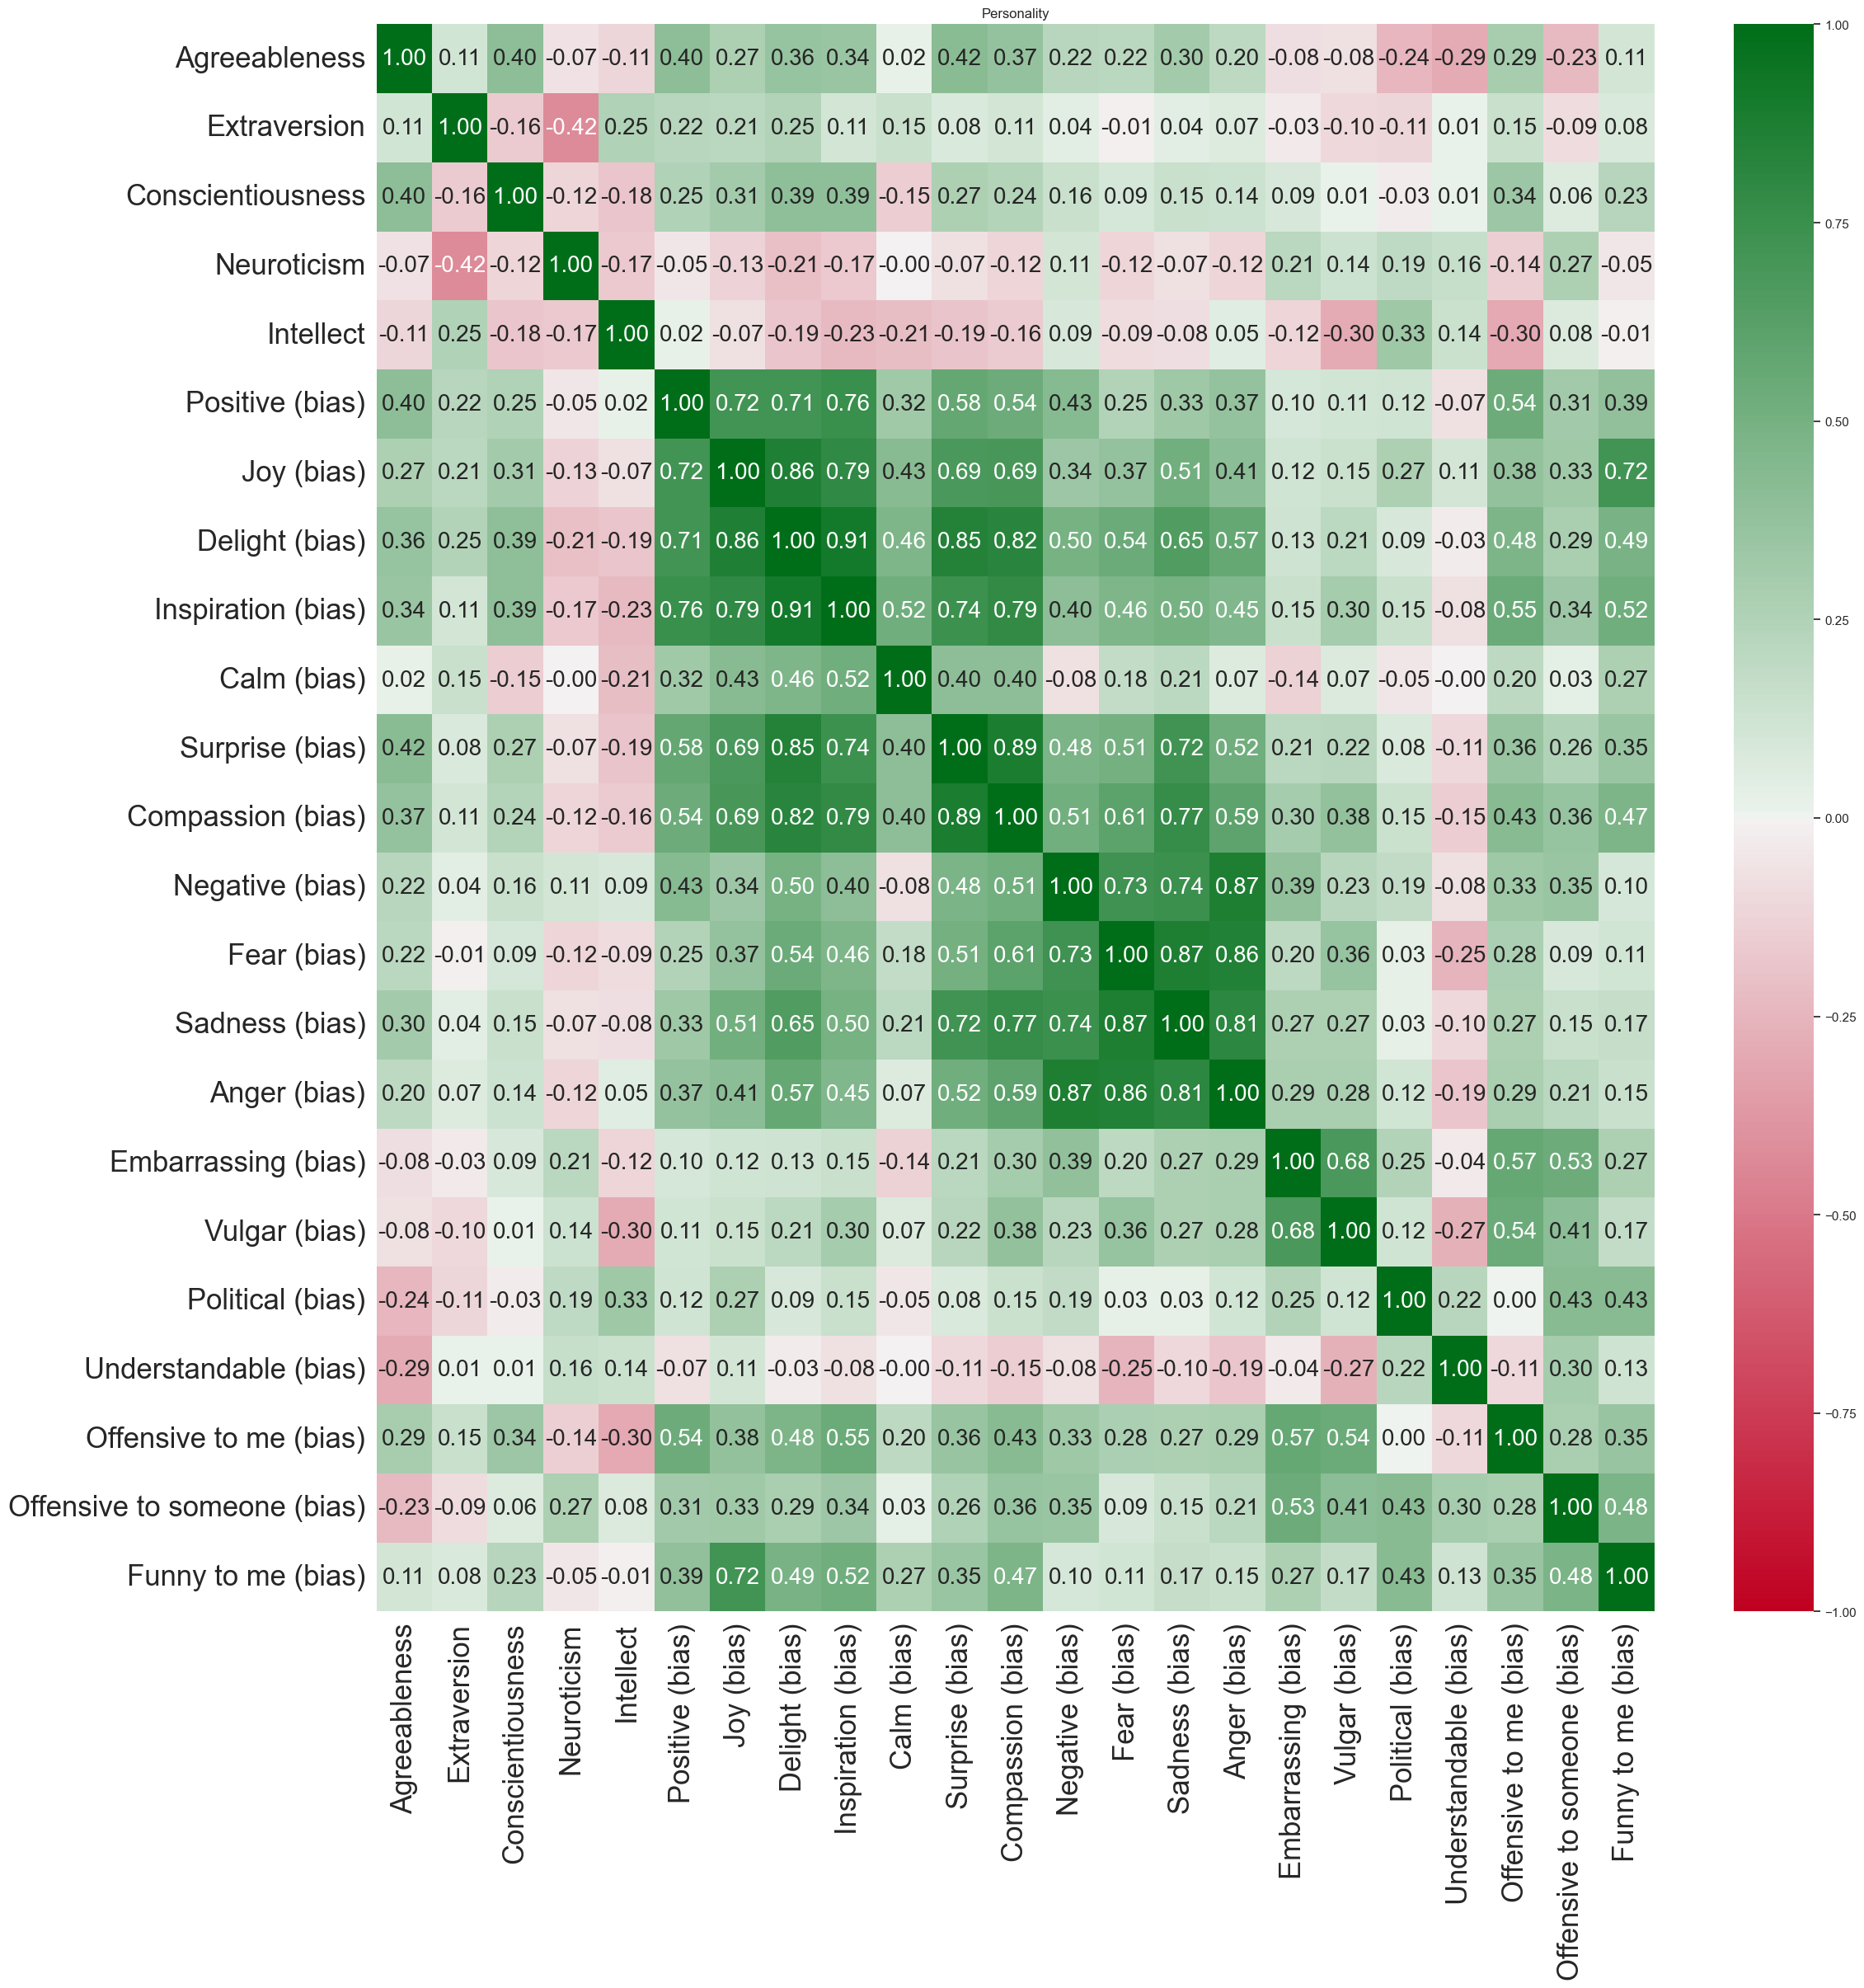

In [13]:
#heatmapa osobowosc
sns.set (rc = {'figure.figsize':(25, 25)})
Accent = sns.diverging_palette(h_neg=10, h_pos=130, s=100, l=40, sep=1, as_cmap=True, ) 
ax = sns.heatmap(df_selected_osobowosc.corr(), cmap = Accent, annot_kws={"size":20},  fmt=".2f", annot=True,           
            vmin=-1, 
            vmax=1,
            center=0,)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)  # Dostosuj wielkość etykiet osi x
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)  # Dostosuj wielkość
ax.set_title('Personality')

#wykres korelacji
osobowosc_korelacja = df_selected_osobowosc.corr()

Regulating emotion systems in everyday life

In [14]:
do_korelacji_ress_cols = ["Relaxation", "Engagement", "Rumination","Reappraisal","Distraction","Suppression",
                    "Pozytywne_bias","Może kogoś bawić?_bias","Mnie bawi/śmieszy?_bias",
                    "Radość_bias","Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias", "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias","Polityczny_bias","Interesujący_bias",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                    "Obraża mnie_bias","Może kogoś atakować / obrażać / lekceważyć_bias"]
do_korelacji_ress_cols_poz = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Pozytywne_bias","Radość_bias",
                    "Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias"]
do_korelacji_ress_cols_neg = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias"] 
do_korelacji_ress_cols_per = ["Agreeableness","Extraversion","Conscientiousness","Neuroticism","Intellect",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                   "Mnie bawi/śmieszy?_bias", "Może kogoś bawić?_bias" ]
ress_wybrane =  ["Relaxation", "Engagement", "Rumination","Reappraisal","Distraction","Suppression",
                    "Positive (bias)",  
                    "Joy (bias)","Delight (bias)","Inspiration (bias)","Calm (bias)",
                    "Surprise (bias)","Compassion (bias)","Negative (bias)",
                    "Fear (bias)","Sadness (bias)","Disgust (bias)",
                    "Anger (bias)", "Ironic (bias)","Embarrassing (bias)","Vulgar (bias)",
                    "Understandable (bias)", "Offensive to me (bias)",
                    "Offensive to someone (bias)", "Funny to me (bias)", "Funny to someone (bias)"]
df_selected_ress = pomiary_hubi_kwestionariusze[ress_wybrane]

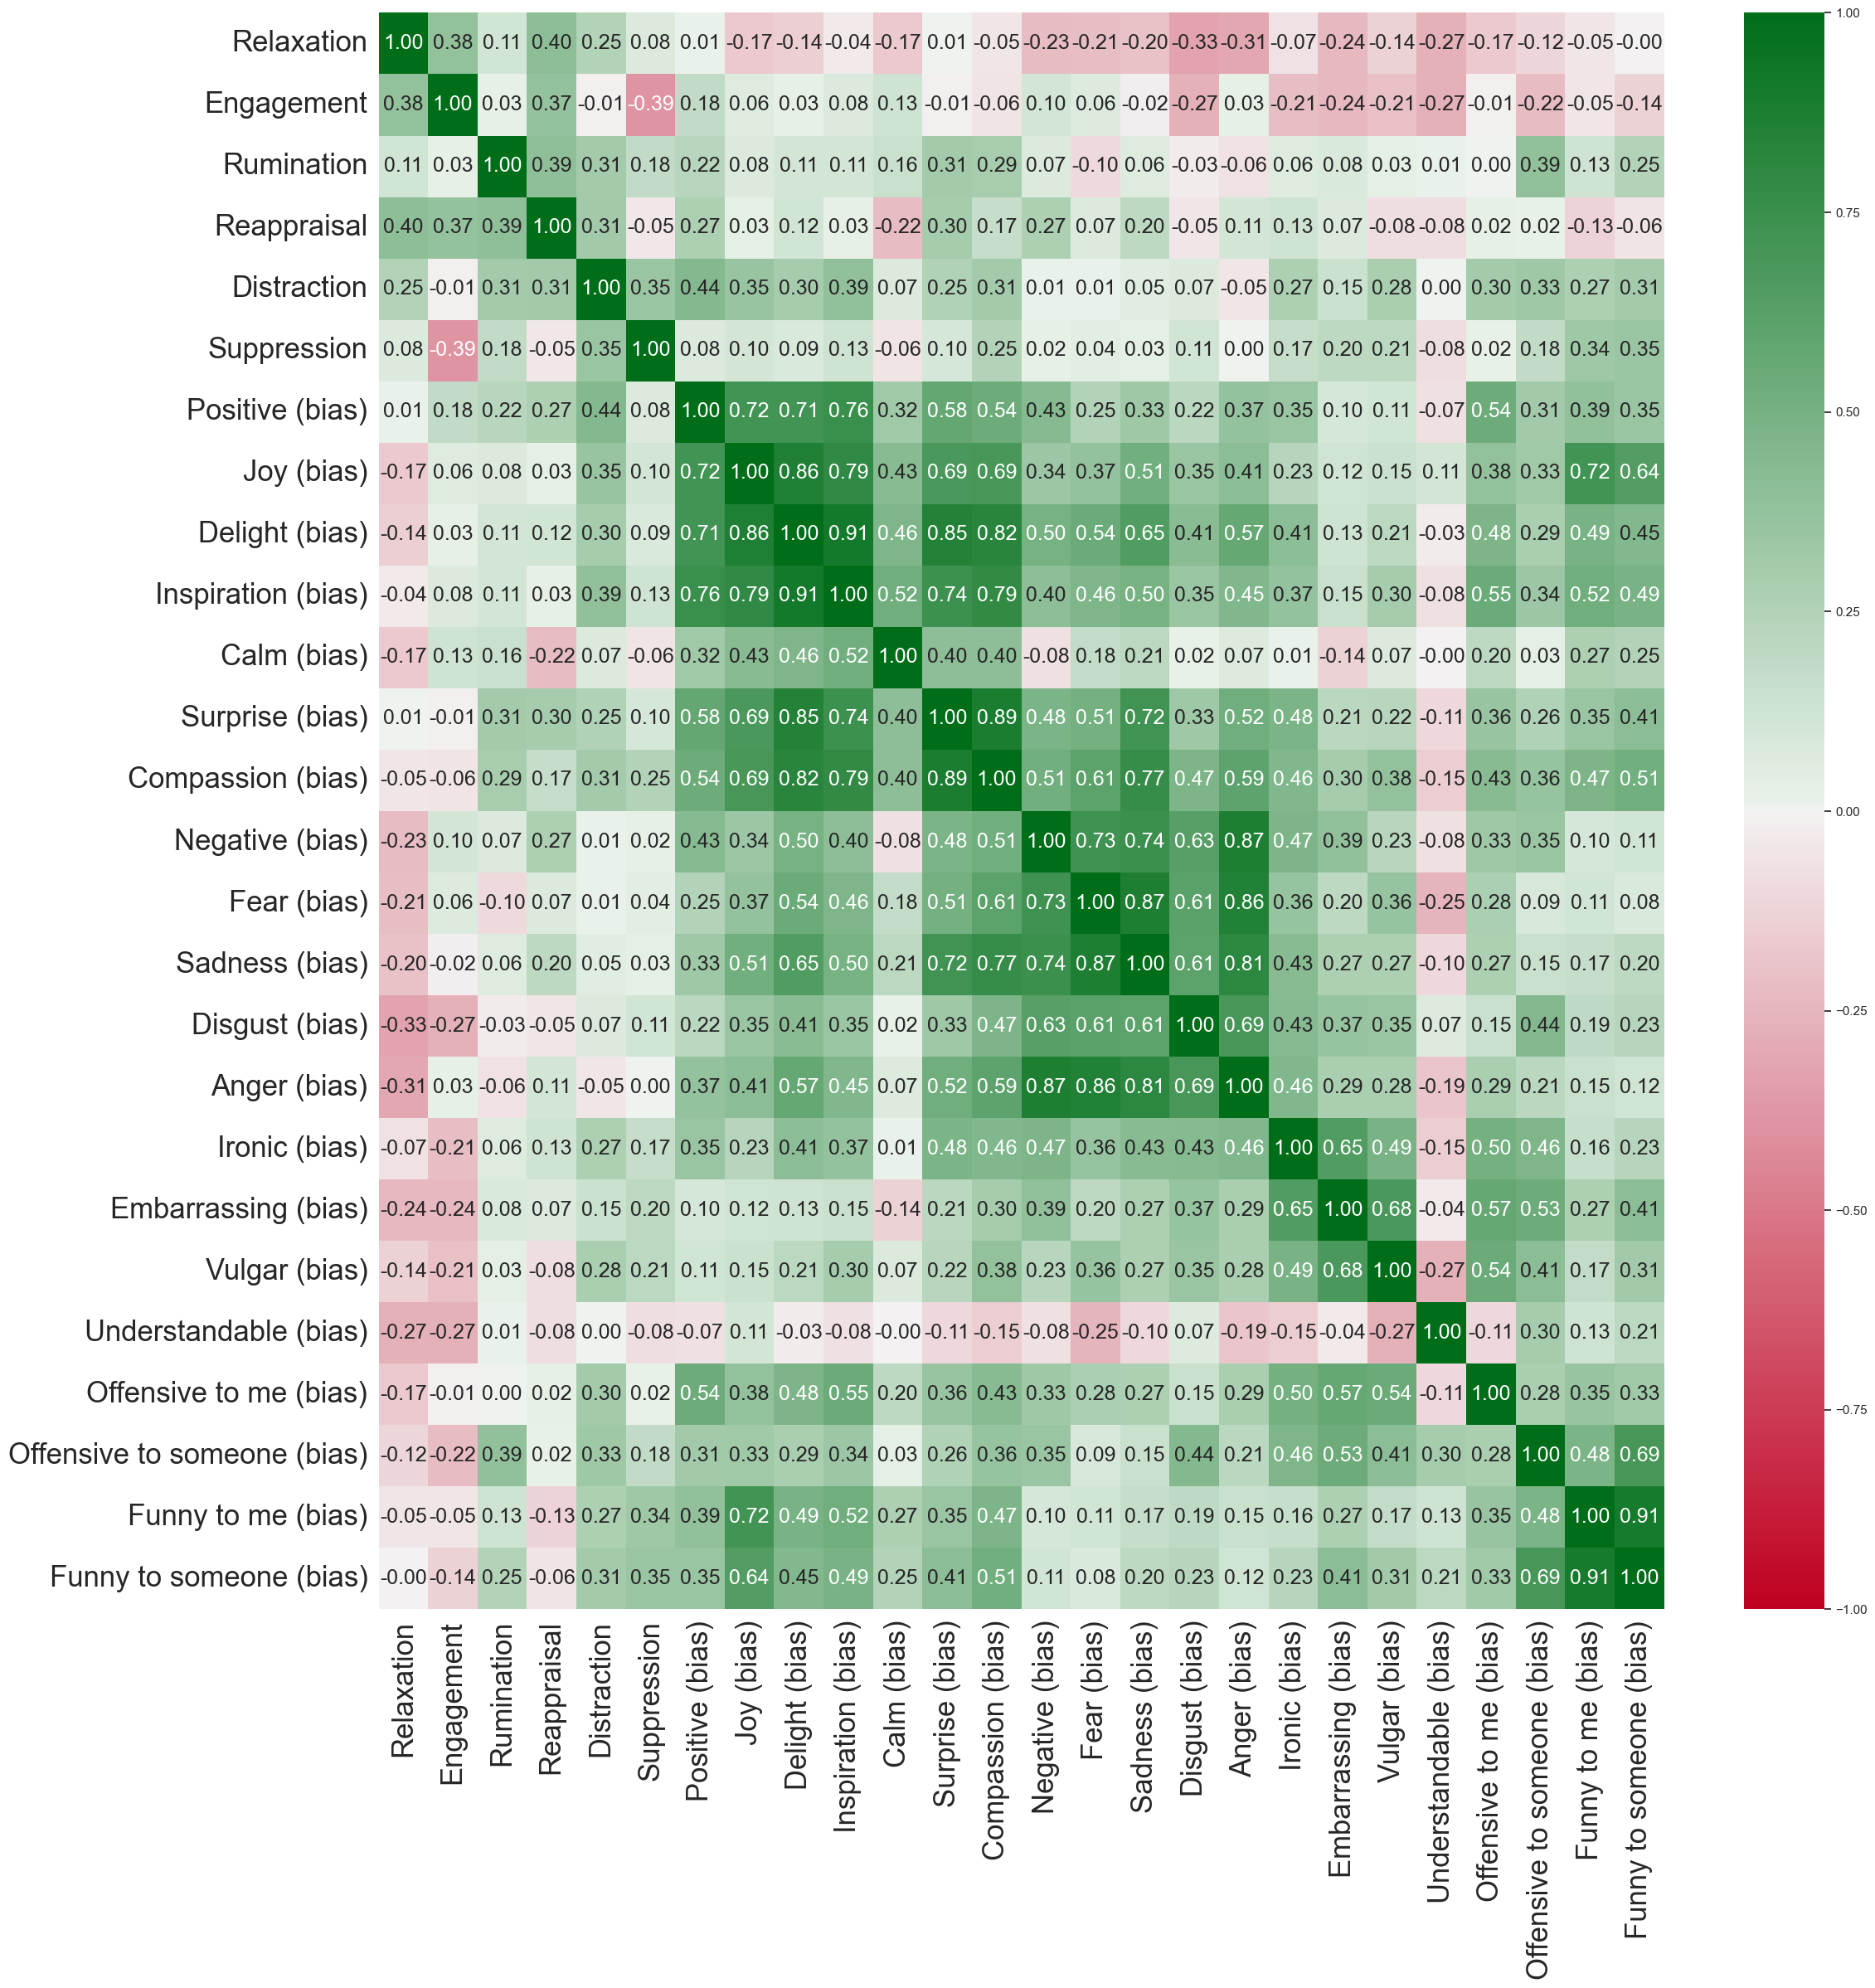

In [15]:
#heatmapa ress
sns.set (rc = {'figure.figsize':(25, 25)})
ax = sns.heatmap(df_selected_ress.corr(), cmap = Accent, annot=True, fmt=".2f",   annot_kws={"size":18 },   vmin=-1, 
            vmax=1,
            center=0,)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)  # Dostosuj wielkość etykiet osi x
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)  # Dostosuj wielkość
#wykres korelacji
ress_korelacja = df_selected_ress.corr()

Stress and emotions

In [16]:
do_korelacji_stress = ["Alexytymia", "Stress", "Positive affect","Negative affect", "Satisfaction with Life",
                    "Pozytywne_bias","Może kogoś bawić?_bias","Mnie bawi/śmieszy?_bias",
                    "Radość_bias","Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias", "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias","Polityczny_bias","Interesujący_bias",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                    "Obraża mnie_bias","Może kogoś atakować / obrażać / lekceważyć_bias"]
do_korelacji_wybrane = ["Alexytymia", "Stress", "Positive affect","Negative affect", "Satisfaction with Life",
                    "Positive (bias)",
                    "Inspiration (bias)", "Surprise (bias)", "Negative (bias)",
                    "Fear (bias)","Sadness (bias)","Disgust (bias)",
                    "Embarrassing (bias)","Vulgar (bias)","Political (bias)",
                    "Understandable (bias)","Offensive to someone (bias)","Funny to someone (bias)","Funny to me (bias)"]
df_selected_stress = pomiary_hubi_kwestionariusze[do_korelacji_wybrane]

[Text(0, 0.5, 'Alexytymia'),
 Text(0, 1.5, 'Stress'),
 Text(0, 2.5, 'Positive affect'),
 Text(0, 3.5, 'Negative affect'),
 Text(0, 4.5, 'Satisfaction with Life'),
 Text(0, 5.5, 'Positive (bias)'),
 Text(0, 6.5, 'Inspiration (bias)'),
 Text(0, 7.5, 'Surprise (bias)'),
 Text(0, 8.5, 'Negative (bias)'),
 Text(0, 9.5, 'Fear (bias)'),
 Text(0, 10.5, 'Sadness (bias)'),
 Text(0, 11.5, 'Disgust (bias)'),
 Text(0, 12.5, 'Embarrassing (bias)'),
 Text(0, 13.5, 'Vulgar (bias)'),
 Text(0, 14.5, 'Political (bias)'),
 Text(0, 15.5, 'Understandable (bias)'),
 Text(0, 16.5, 'Offensive to someone (bias)'),
 Text(0, 17.5, 'Funny to someone (bias)'),
 Text(0, 18.5, 'Funny to me (bias)')]

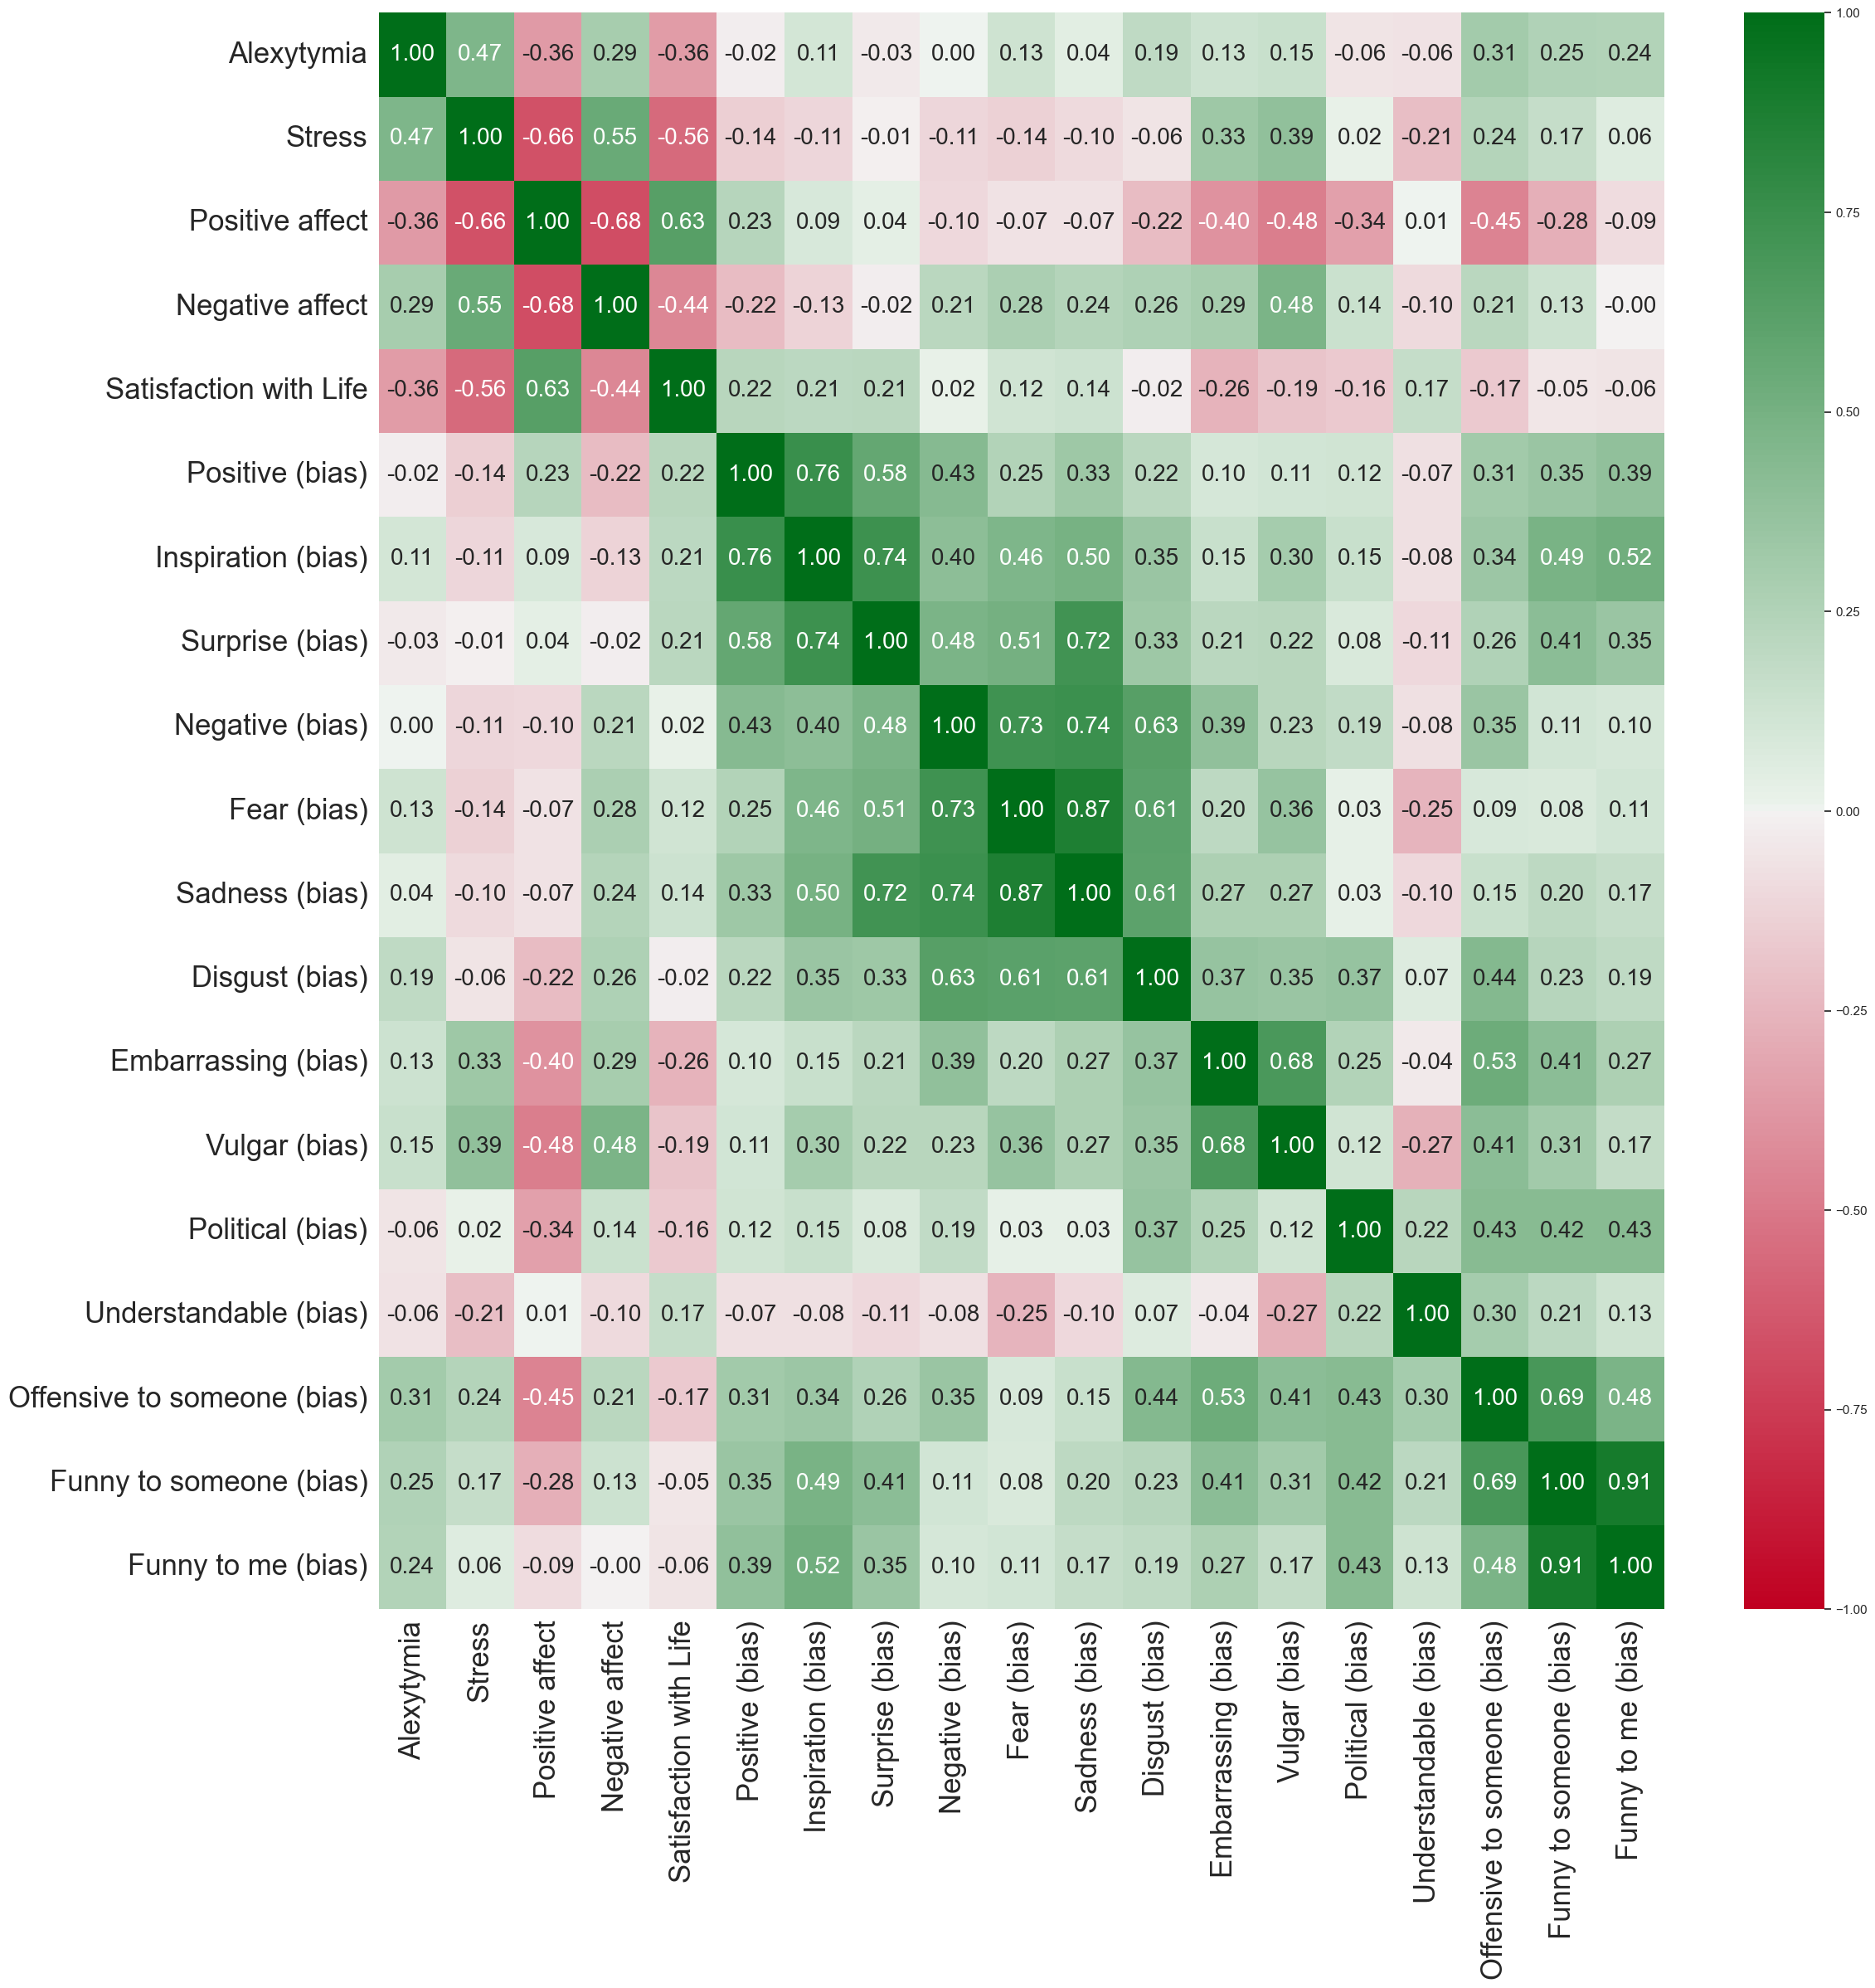

In [17]:
#heatmapa Stres
sns.set (rc = {'figure.figsize':(25, 25)})
ax = sns.heatmap(df_selected_stress.corr(),  cmap=Accent, fmt=".2f", annot_kws={"size":20}, annot=True,        vmin=-1, 
            vmax=1,
            center=0,)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)  # Dostosuj wielkość etykiet osi x
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)  # Dostosuj wielkość

Health

In [18]:
do_korelacji_health = ["Depression", "Sleep Disturbance", "Headaches","Gastrointestinal Problems", "Respiratory Infections",
                    "Pozytywne_bias","Może kogoś bawić?_bias","Mnie bawi/śmieszy?_bias",
                    "Radość_bias","Zachwyt_bias","Inspiruje_bias",
                    "Spokój_bias","Zaskoczenie_bias","Współczucie_bias", "Negatywne_bias",
                    "Strach_bias","Smutek_bias","Wstręt_bias",
                    "Złość_bias","Ironiczny_bias","Żenujący_bias",
                    "Wulgarny_bias","Polityczny_bias","Interesujący_bias",
                    "Zrozumiały_bias","Potrzebuję więcej informacji, aby ocenić ten tekst_bias",
                    "Obraża mnie_bias","Może kogoś atakować / obrażać / lekceważyć_bias"]
wybrane_health = ["Depression", "Sleep Disturbance", "Headaches","Gastrointestinal Problems", "Respiratory Infections",
                    "Positive (bias)",
                    "Joy (bias)","Compassion (bias)",
                    "Fear (bias)", "Disgust (bias)",
                    "Anger (bias)","Ironic (bias)","Embarrassing (bias)",
                    "Vulgar (bias)","Interesting (bias)",
                    "Understandable (bias)","Incomprehensible (bias)",
                    "Offensive to me (bias)","Offensive to someone (bias)"]
df_selected_health = pomiary_hubi_kwestionariusze[wybrane_health]

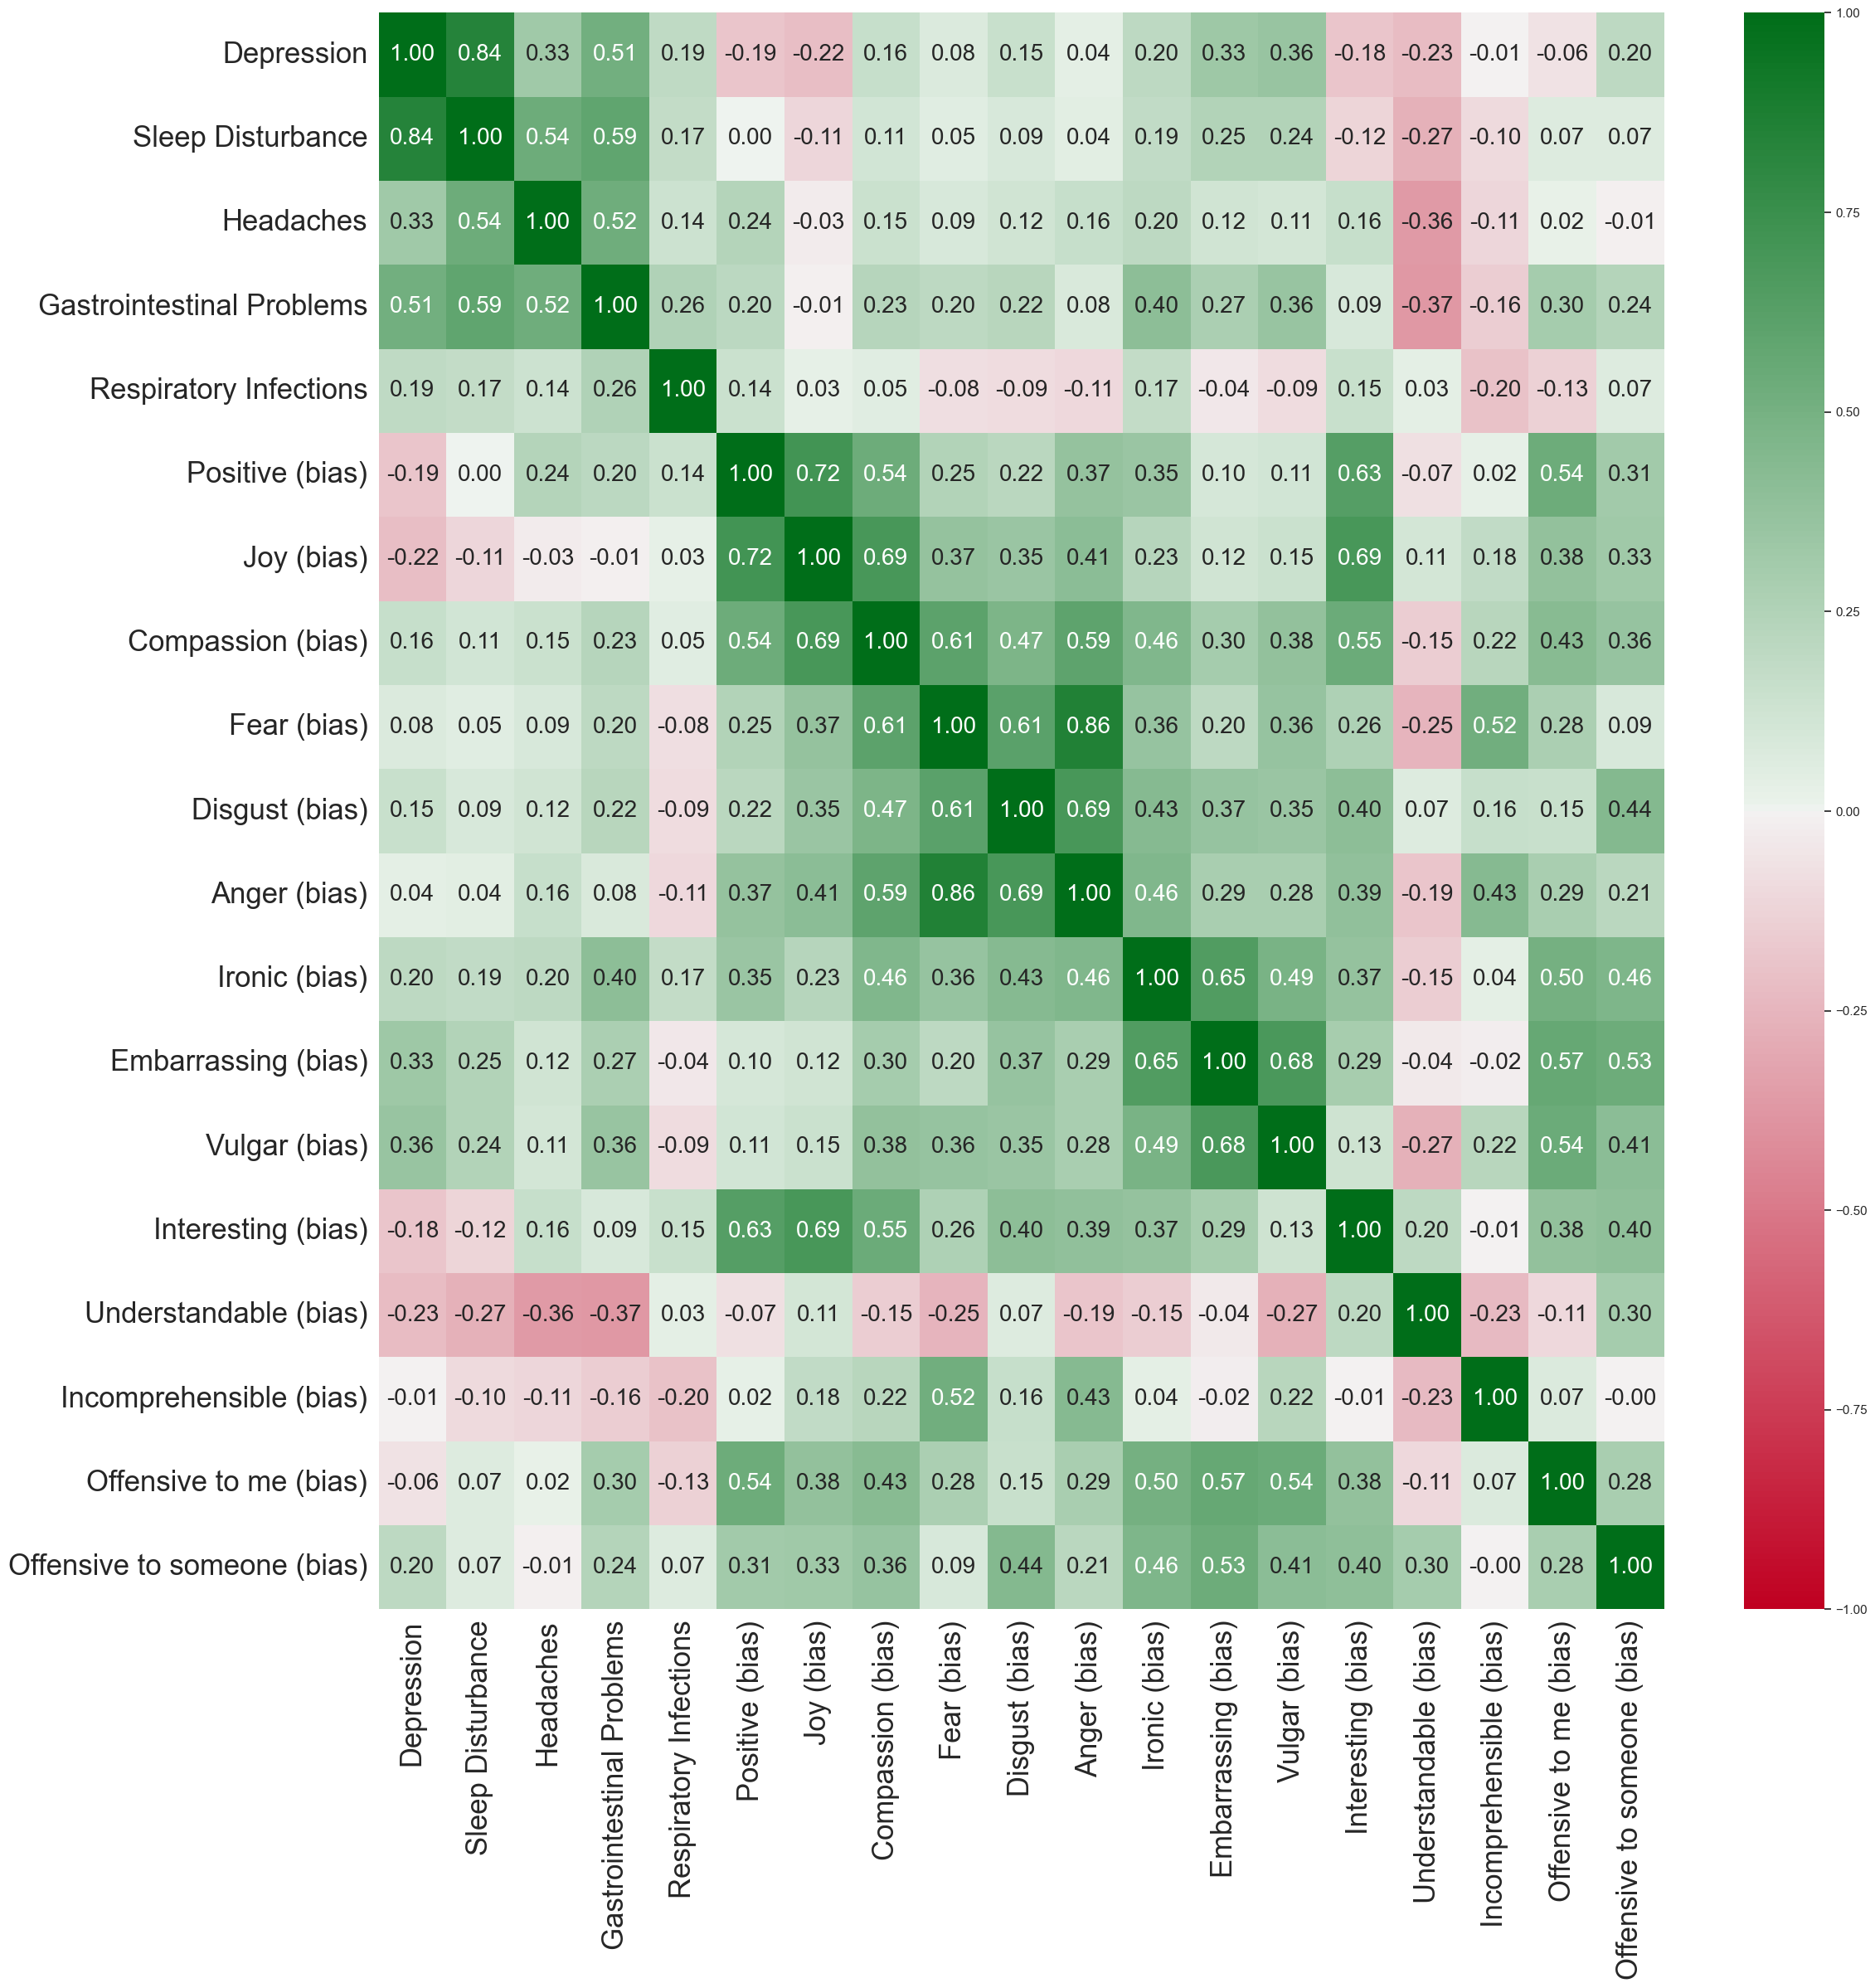

In [19]:
#heatmapa health
sns.set (rc = {'figure.figsize':(25, 25)})
ax = sns.heatmap(df_selected_health.corr(),  cmap=Accent,  annot_kws={"size":20},  fmt=".2f", annot=True,
            vmin=-1, 
            vmax=1,
            center=0,)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)  # Dostosuj wielkość etykiet osi x
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)  # Dostosuj wielkość
#wykres korelacji
health_korelacja = df_selected_health.corr()